# Lung Cancer Prediction 

**The effectiveness of cancer prediction system helps the people to know their cancer risk with low cost and it also helps the people to take the appropriate decision based on their cancer risk status. The data is collected from the website online lung cancer prediction system .**

**Total no. of attributes:16 No .of instances:284 Attribute information: 1. Gender: M(male), F(female) 2. Age: Age of the patient 3. Smoking: YES=2 , NO=1. 4. Yellow fingers: YES=2 , NO=1. 5. Anxiety: YES=2 , NO=1. 6. Peer_pressure: YES=2 , NO=1. 7. Chronic Disease: YES=2 , NO=1. 8. Fatigue: YES=2 , NO=1. 9. Allergy: YES=2 , NO=1. 10. Wheezing: YES=2 , NO=1. 11. Alcohol: YES=2 , NO=1. 12. Coughing: YES=2 , NO=1. 13. Shortness of Breath: YES=2 , NO=1. 14. Swallowing Difficulty: YES=2 , NO=1. 15. Chest pain: YES=2 , NO=1. 16. Lung Cancer: YES , NO.**

In [85]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from imblearn.over_sampling import ADASYN

#For ignoring warning
import warnings
warnings.filterwarnings("ignore")

In [18]:

# Specify the path to the CSV file relative to the notebook
file_path = '../data/survey_lung_cancer.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


## Exploratory data Analysis

**Note: In this dataset, YES=2 & NO=1**

In [19]:
df.shape

(309, 16)

In [20]:
#Checking for Duplicates
df.duplicated().sum()

np.int64(33)

In [21]:
#Removing Duplicates
df=df.drop_duplicates()

In [22]:
#Checking for null values
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC_DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL_CONSUMING        0
COUGHING                 0
SHORTNESS_OF_BREATH      0
SWALLOWING_DIFFICULTY    0
CHEST_PAIN               0
LUNG_CANCER              0
dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 276 entries, 0 to 283
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 276 non-null    object
 1   AGE                    276 non-null    int64 
 2   SMOKING                276 non-null    int64 
 3   YELLOW_FINGERS         276 non-null    int64 
 4   ANXIETY                276 non-null    int64 
 5   PEER_PRESSURE          276 non-null    int64 
 6   CHRONIC_DISEASE        276 non-null    int64 
 7   FATIGUE                276 non-null    int64 
 8   ALLERGY                276 non-null    int64 
 9   WHEEZING               276 non-null    int64 
 10  ALCOHOL_CONSUMING      276 non-null    int64 
 11  COUGHING               276 non-null    int64 
 12  SHORTNESS_OF_BREATH    276 non-null    int64 
 13  SWALLOWING_DIFFICULTY  276 non-null    int64 
 14  CHEST_PAIN             276 non-null    int64 
 15  LUNG_CANCER            276 n

In [24]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN
count,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000
mean,62.909420,1.543478,1.576087,1.496377,1.507246,1.521739,1.663043,1.547101,1.547101,1.550725,1.576087,1.630435,1.467391,1.557971
std,8.379355,0.499011,0.495075,0.500895,0.500856,0.500435,0.473529,0.498681,0.498681,0.498324,0.495075,0.483564,0.499842,0.497530
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.500000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In this dataset, the `GENDER` and `LUNG_CANCER` attributes are currently of object data type. To convert these to numerical values, we will use the `LabelEncoder` from the `sklearn.preprocessing` module. 

`LabelEncoder` is a utility class that helps normalize labels, making them numeric and ensuring they contain only values between 0 and `n_classes - 1`. It can also be used to transform non-numerical labels into numerical values, as long as the labels are hashable and comparable.

The conversion steps are as follows:

1. **GENDER & LUNG_CANCER to Numerical**:
    - `GENDER` (which may contain values like "Male" and "Female") will be converted into a numerical format (e.g., Male = 1, Female = 0).
    - `LUNG_CANCER` (which may contain values like "YES" and "NO") will also be converted into numerical format (YES = 1, NO = 0).
    
2. **Other Attributes (YES/NO)**:
    - For all other attributes in the dataset that contain "YES" or "NO", we will map "YES" to 1 and "NO" to 0 to represent these values numerically.
    
Here's how the Python code for this preprocessing task will look:

In [68]:
# Convert all columns to lower cases

df.columns = df.columns.str.strip().str.lower()

In [29]:
# Label Encoder

def encode_selected_columns(df, columns_to_encode):
    # Initialize the LabelEncoder
    le = preprocessing.LabelEncoder()
    
    # Loop through the specified columns and apply LabelEncoder
    for column in columns_to_encode:
        if column in df.columns:
            df[column] = le.fit_transform(df[column])
        else:
            print(f"Column '{column}' not found in DataFrame.")
    
    return df

In [31]:
columns_to_encode = ['gender', 'smoking', 'yellow_fingers', 'anxiety',
       'peer_pressure', 'chronic_disease', 'fatigue ', 'allergy ', 'wheezing',
       'alcohol_consuming', 'coughing', 'shortness_of_breath',
       'swallowing_difficulty', 'chest_pain', 'lung_cancer']

df = encode_selected_columns(df, columns_to_encode)


In [32]:
df.head()

,gender,age,smoking,yellow_fingers,anxiety,peer_pressure,chronic_disease,fatigue,allergy,wheezing,alcohol_consuming,coughing,shortness_of_breath,swallowing_difficulty,chest_pain,lung_cancer
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0


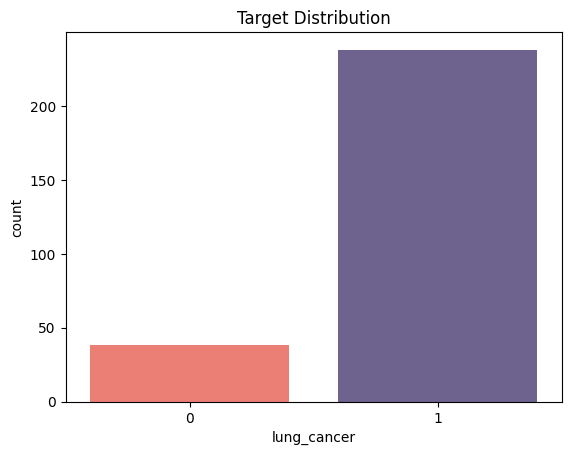

In [34]:
#Let's check the distributaion of Target variable.
# Custom colors for the classes
colors = ['#FF6F61', '#6B5B95']  # You can modify these hex colors as needed

# Create the count plot with custom colors
sns.countplot(x='lung_cancer', data=df, palette=colors)
plt.title('Target Distribution')

# Display the plot
plt.show()

In [36]:
df['lung_cancer'].value_counts()

lung_cancer
1    238
0     38
Name: count, dtype: int64

In [39]:
# function for plotting
def plot(col, df=df):
    return df.groupby(col)['lung_cancer'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(8,5))

<Axes: xlabel='gender'>

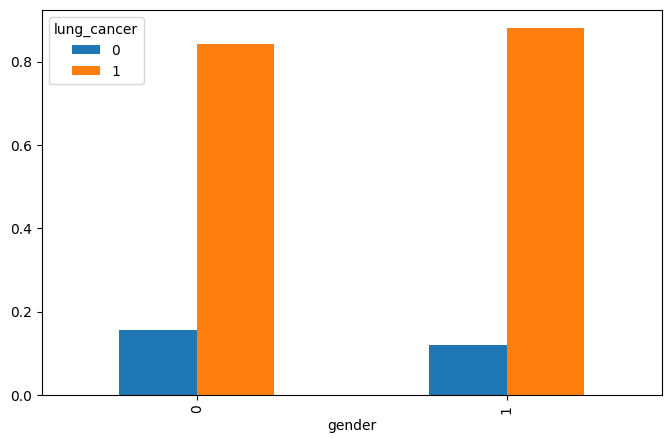

In [40]:
plot("gender")

<Axes: xlabel='age'>

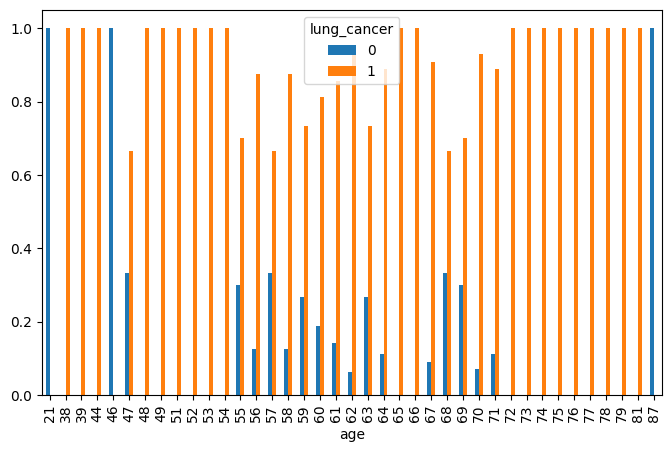

In [41]:
plot("age")

<Axes: xlabel='smoking'>

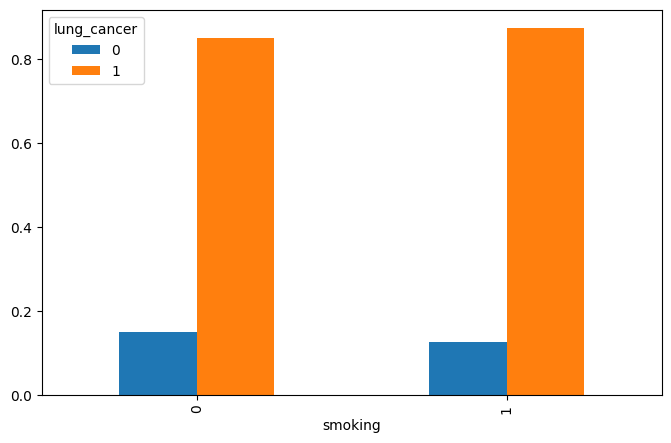

In [42]:
plot("smoking")

<Axes: xlabel='yellow_fingers'>

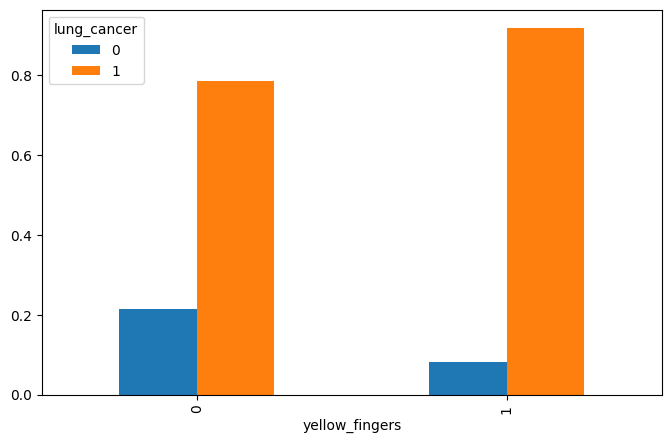

In [43]:
plot("yellow_fingers")

<Axes: xlabel='anxiety'>

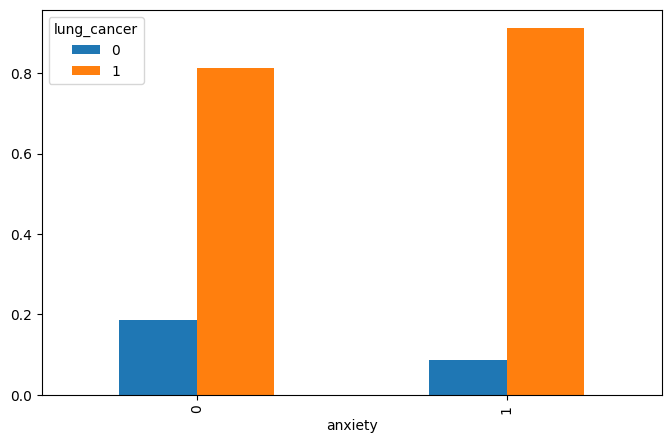

In [45]:
plot("anxiety")

<Axes: xlabel='peer_pressure'>

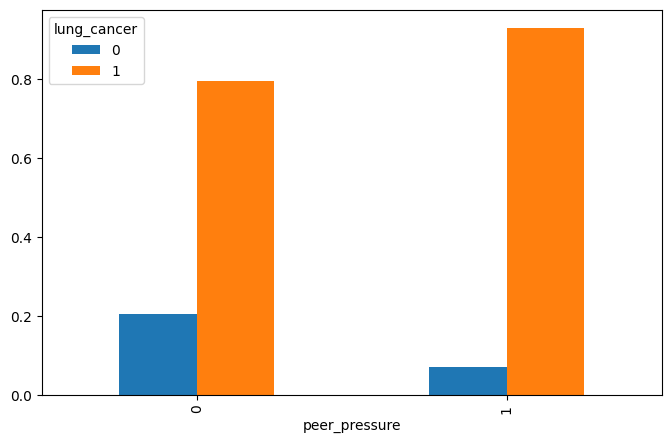

In [47]:
plot("peer_pressure")

<Axes: xlabel='chronic_disease'>

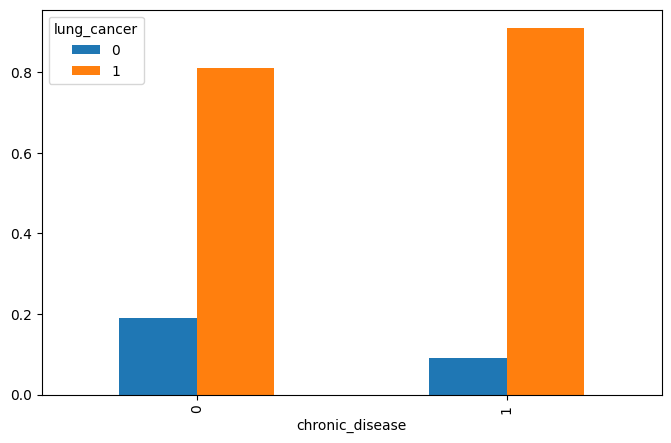

In [48]:
plot("chronic_disease")

<Axes: xlabel='fatigue'>

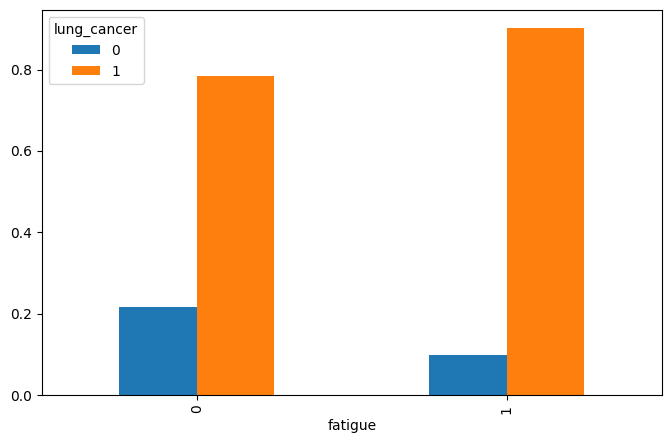

In [70]:
plot('fatigue')

<Axes: xlabel='allergy'>

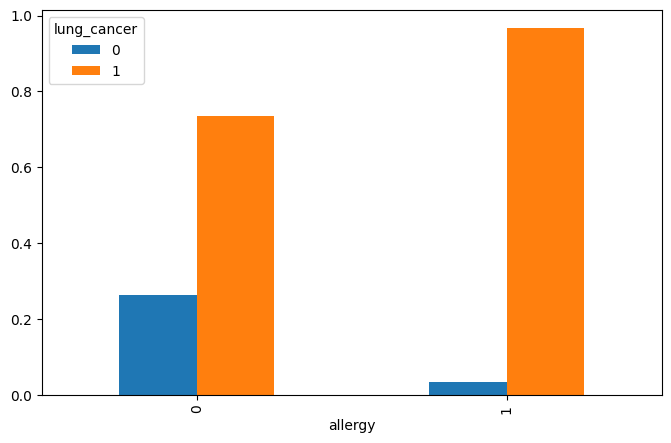

In [71]:
plot('allergy')

<Axes: xlabel='wheezing'>

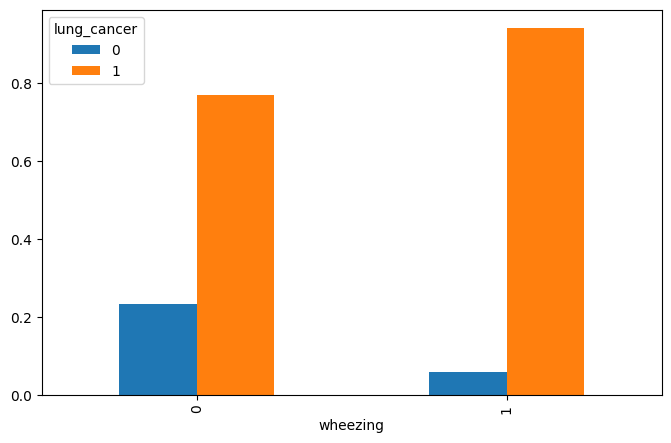

In [72]:
plot('wheezing')

<Axes: xlabel='alcohol_consuming'>

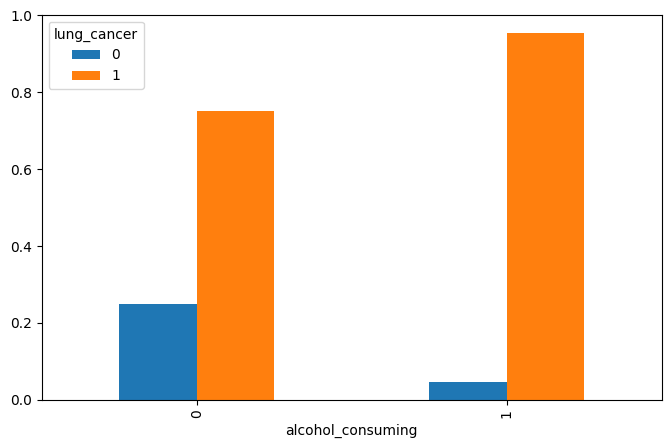

In [73]:
plot('alcohol_consuming')

<Axes: xlabel='coughing'>

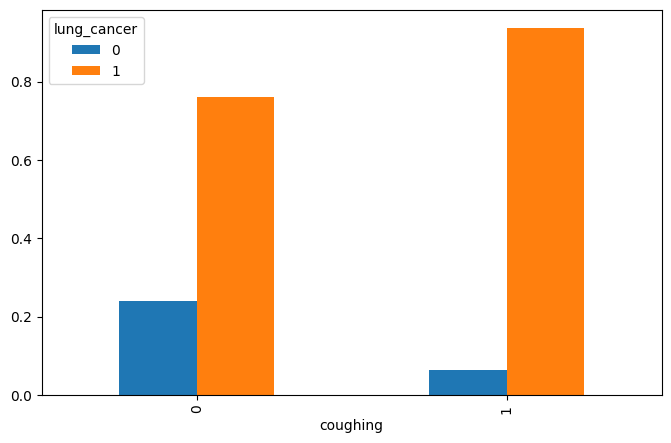

In [74]:
plot('coughing')

<Axes: xlabel='shortness_of_breath'>

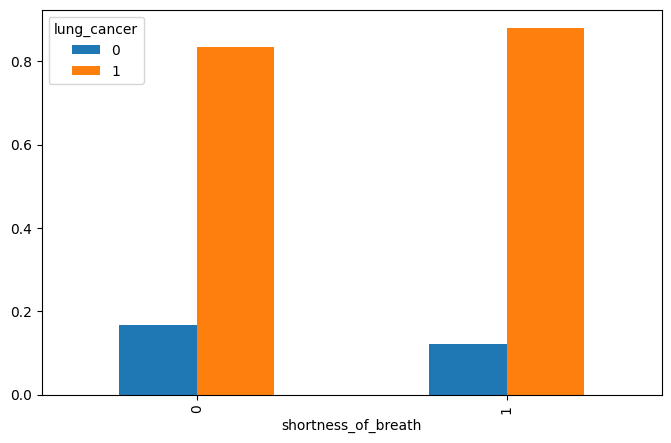

In [75]:
plot("shortness_of_breath")

<Axes: xlabel='swallowing_difficulty'>

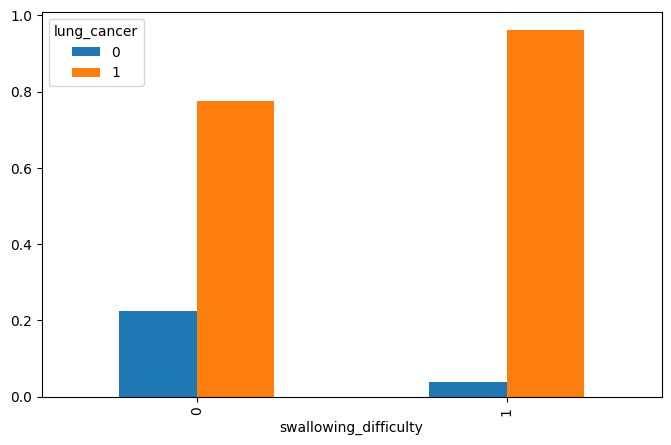

In [76]:
plot("swallowing_difficulty")

<Axes: xlabel='chest_pain'>

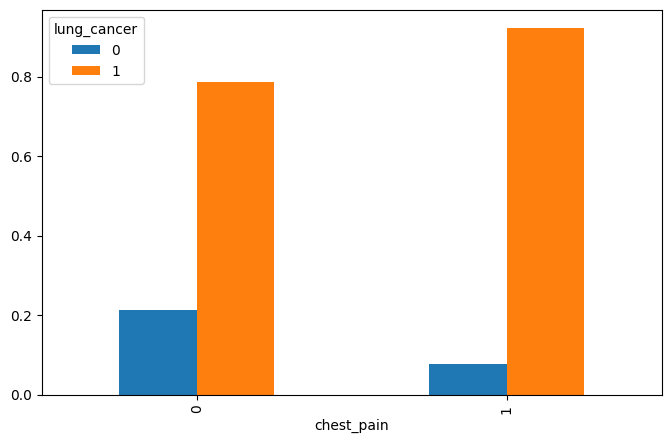

In [77]:
plot("chest_pain")

From the visualizations, it is clear that in the given dataset, the features GENDER, AGE, SMOKING and SHORTNESS OF BREATH don't have that much relationship with LUNG CANCER. So let's drop those features to make this dataset more clean.

In [79]:
df_new=df.drop(columns=['gender','age', 'smoking', 'shortness_of_breath'])
df_new

,yellow_fingers,anxiety,peer_pressure,chronic_disease,fatigue,allergy,wheezing,alcohol_consuming,coughing,swallowing_difficulty,chest_pain,lung_cancer
0,1,1,0,0,1,0,1,1,1,1,1,1
1,0,0,0,1,1,1,0,0,0,1,1,1
2,0,0,1,0,1,0,1,0,1,0,1,0
3,1,1,0,0,0,0,0,1,0,1,1,0
4,1,0,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
279,1,1,1,0,0,1,1,0,1,1,0,1
280,0,0,0,1,1,1,0,0,0,0,0,0
281,0,0,0,0,1,1,0,0,0,0,1,0
282,1,1,0,0,0,0,0,0,0,1,1,0


### Correlation

In [80]:
#Finding Correlation
correlation=df_new.corr()
correlation

,yellow_fingers,anxiety,peer_pressure,chronic_disease,fatigue,allergy,wheezing,alcohol_consuming,coughing,swallowing_difficulty,chest_pain,lung_cancer
yellow_fingers,1.000000,0.558344,0.313067,0.015316,-0.099644,-0.147130,-0.058756,-0.273643,0.020803,0.333349,-0.099169,0.189192
anxiety,0.558344,1.000000,0.210278,-0.006938,-0.181474,-0.159451,-0.174009,-0.152228,-0.218843,0.478820,-0.123182,0.144322
peer_pressure,0.313067,0.210278,1.000000,0.042893,0.094661,-0.066887,-0.037769,-0.132603,-0.068224,0.327764,-0.074655,0.195086
chronic_disease,0.015316,-0.006938,0.042893,1.000000,-0.099411,0.134309,-0.040546,0.010144,-0.160813,0.068263,-0.048895,0.143692
fatigue,-0.099644,-0.181474,0.094661,-0.099411,1.000000,-0.001841,0.152151,-0.181573,0.148538,-0.115727,0.013757,0.160078
allergy,-0.147130,-0.159451,-0.066887,0.134309,-0.001841,1.000000,0.166517,0.378125,0.206367,-0.037581,0.245440,0.333552
wheezing,-0.058756,-0.174009,-0.037769,-0.040546,0.152151,0.166517,1.000000,0.261061,0.353657,0.108304,0.142846,0.249054
alcohol_consuming,-0.273643,-0.152228,-0.132603,0.010144,-0.181573,0.378125,0.261061,1.000000,0.198023,-0.000635,0.310767,0.294422
coughing,0.020803,-0.218843,-0.068224,-0.160813,0.148538,0.206367,0.353657,0.198023,1.000000,-0.136885,0.077988,0.253027
swallowing_difficulty,0.333349,0.478820,0.327764,0.068263,-0.115727,-0.037581,0.108304,-0.000635,-0.136885,1.000000,0.102674,0.268940


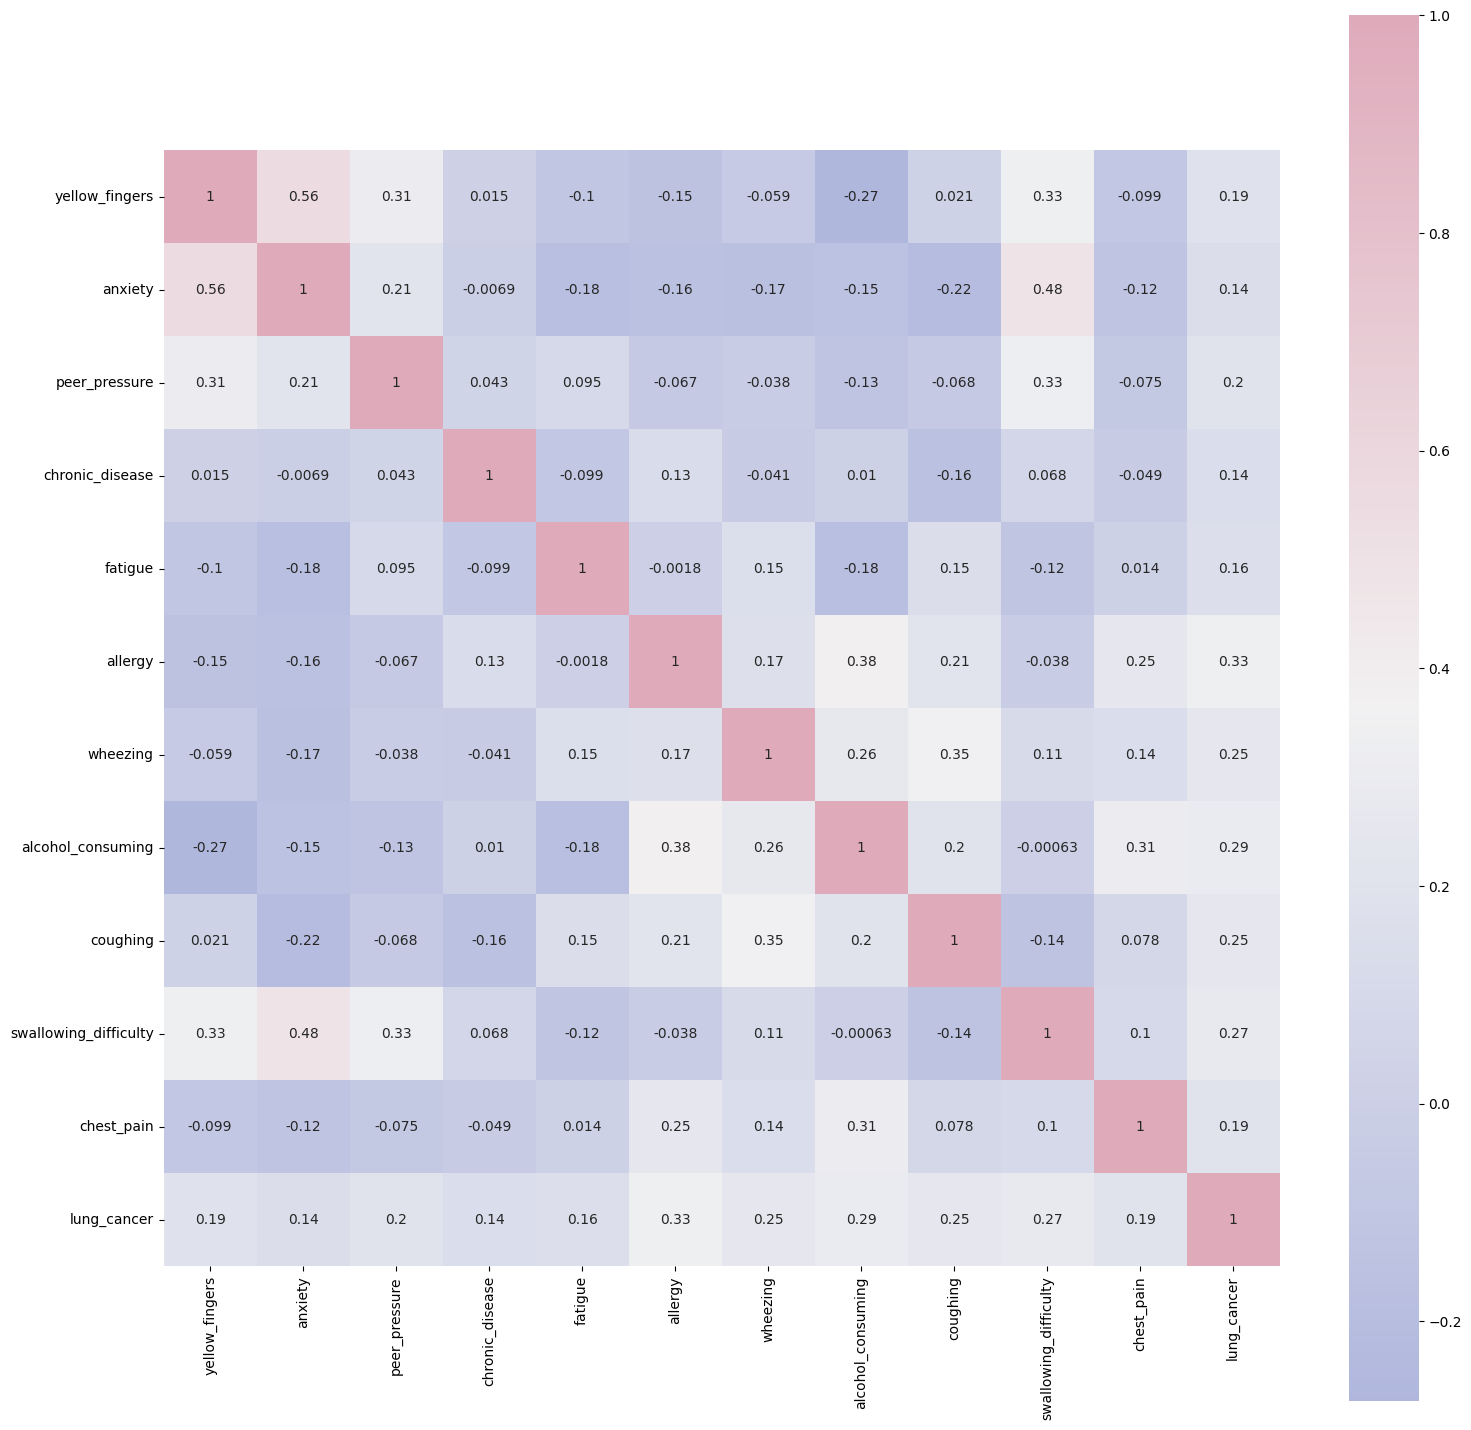

In [81]:
#Correlation 
cmap=sns.diverging_palette(260,-10,s=50, l=75, n=6,
as_cmap=True)
plt.subplots(figsize=(18,18))
sns.heatmap(correlation,cmap=cmap,annot=True, square=True)
plt.show()

<Axes: >

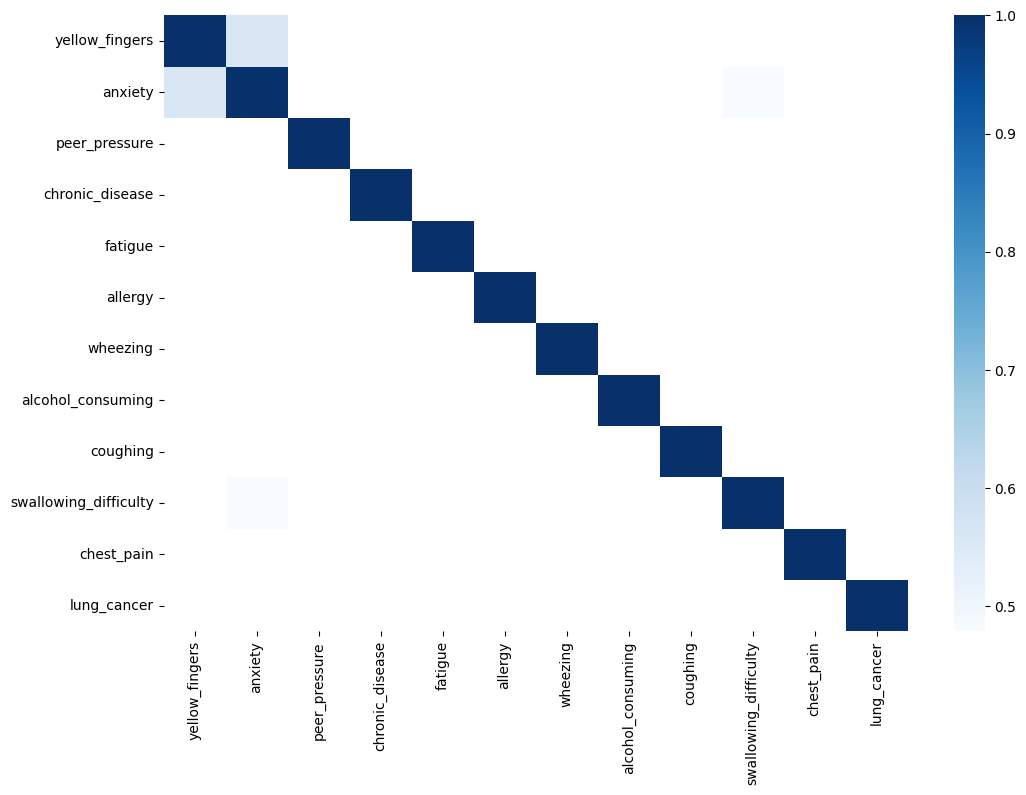

In [82]:

kot = correlation[correlation>=.40]
plt.figure(figsize=(12,8))
sns.heatmap(kot, cmap="Blues")


Correlation Matrix:


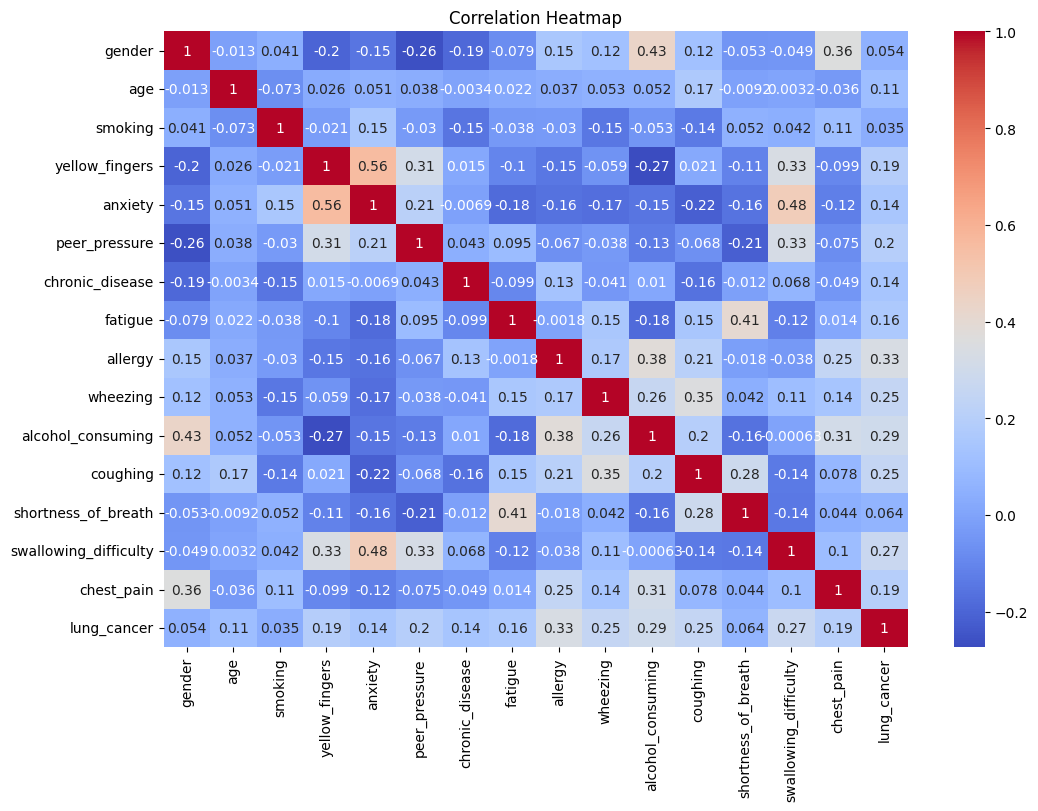

In [94]:
# 3. Correlation Matrix and Heatmap
print("\nCorrelation Matrix:")
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Feature Engineering

Feature Engineering is the process of creating new features using existing features.

*The correlation matrix shows that ANXIETY and YELLOW_FINGERS are correlated more than 50%. So, lets create a new feature combining them.*

In [83]:
df_new['anx_yell_fin']=df_new['anxiety']*df_new['yellow_fingers']
df_new

,yellow_fingers,anxiety,peer_pressure,chronic_disease,fatigue,allergy,wheezing,alcohol_consuming,coughing,swallowing_difficulty,chest_pain,lung_cancer,anx_yell_fin
0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,0,0,0,1,1,1,0,0,0,1,1,1,0
2,0,0,1,0,1,0,1,0,1,0,1,0,0
3,1,1,0,0,0,0,0,1,0,1,1,0,1
4,1,0,0,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,1,1,1,0,0,1,1,0,1,1,0,1,1
280,0,0,0,1,1,1,0,0,0,0,0,0,0
281,0,0,0,0,1,1,0,0,0,0,1,0,0
282,1,1,0,0,0,0,0,0,0,1,1,0,1


In [84]:
# Splitting independent and dependent variables
X = df_new.drop('lung_cancer', axis = 1)
y = df_new['lung_cancer']

## Target Distribution Imbalance Handling

In [86]:
adasyn = ADASYN(random_state=42)
X, y = adasyn.fit_resample(X, y)

In [87]:
len(X)

483

## Linear Regression

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [89]:
#Splitting data for training and testing

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.25, random_state=0)

In [91]:
#Fitting training data to the model

lr_model=LogisticRegression(random_state=0)
lr_model.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [92]:
#Predicting result using testing data
y_lr_pred= lr_model.predict(X_test)
y_lr_pred

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0])

In [93]:
#Model accuracy
from sklearn.metrics import classification_report, accuracy_score, f1_score
lr_cr=classification_report(y_test, y_lr_pred)
print(lr_cr)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        60
           1       0.95      0.95      0.95        61

    accuracy                           0.95       121
   macro avg       0.95      0.95      0.95       121
weighted avg       0.95      0.95      0.95       121

